In [23]:
%matplotlib inline
import numpy as np
import wavelet_transforms as wts
from nonguassianextraction import fan_transform, powerlawmod
from astropy.io import fits
import matplotlib.pyplot as plt
import fbm2d as fbm
print 'done import'

done import


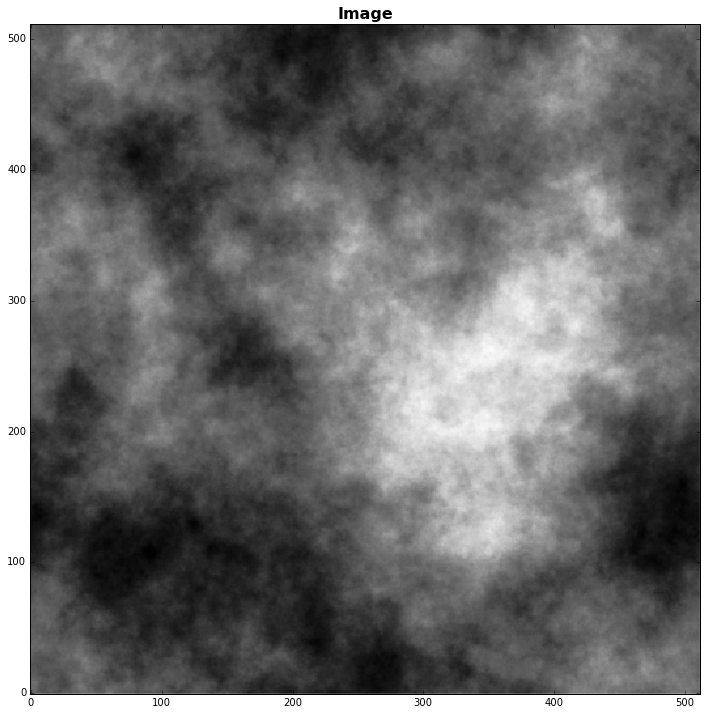

In [24]:
#image creation#
image=fbm.fbm2d(-3.2,512,512)
image=np.exp(image)
image=image-image.min()


original, oax = plt.subplots(1,1,figsize=(12, 12))
oax.imshow(image, origin='lower', interpolation='None', cmap='Greys_r')
oax.set_title('Image', fontsize=16, fontweight='bold')

In [25]:
 #image modification#
wt,Wn,Wc, tab_k, S1ac, S1a= fan_transform(image)
wCmod=powerlawmod(abs(wt), Wc, tab_k, 14, -2.5, S1ac, S1a)
Wc=np.sum(Wc[:], axis=3)
phase=(np.arctan2((Wn.imag+Wc.imag),(Wn.real+Wc.real)))
cphase=np.arctan2(Wc.imag,Wc.real)
nphase=np.arctan2(Wn.imag,Wn.real)
wCmod[np.isnan(wCmod)]=0
    
modcopy=abs(wCmod.copy())
modcopy=modcopy*np.cos(cphase)
wCmod=abs(wCmod)
wtnew=abs(Wn.copy())
    #wtnew=wtnew*np.cos(nphase)
    #wCmod=wCmod*np.cos(cphase)+wCmod*np.sin(cphase)
    
wtnew[:]=np.sqrt(wtnew[:]**2.+wCmod[:]**2.)
    #wtnew=abs(wtnew)
wtnew = wtnew*np.cos(phase)
    

rec_image=wts.halo_inverse(wtnew,tab_k)



(512, 512, 21)


In [26]:
wt,wn,wc,tab_k,s1ac,s1a=fan_transform(rec_image)
wc=np.sum(wc, axis=3)
rec_c=wts.halo_inverse(wc,tab_k)
rec_n=wts.halo_inverse(wn,tab_k)
x_c=wc.real
y_c=wc.imag
x_n=wn.real
y_n=wn.imag
print 'deconstructed'

deconstructed


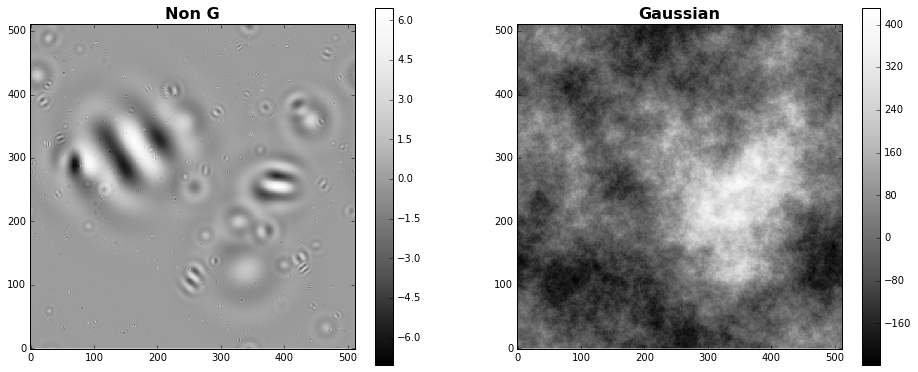

In [35]:
dec, dax = plt.subplots(1,2,figsize=(16, 16))
ngimg=dax[0].imshow(rec_c.real, origin='lower', interpolation='None', cmap='Greys_r')
dax[0].set_title('Non G', fontsize=16, fontweight='bold')
dec.colorbar(ngimg, ax=dax[0], shrink=.4)
gimg=dax[1].imshow(rec_n.real, origin='lower', interpolation='None', cmap='Greys_r')
dax[1].set_title('Gaussian', fontsize=16, fontweight='bold')
dec.colorbar(gimg, ax=dax[1], shrink=.4)

In [28]:
start=10
stop=18
total=stop-start+1
col=int(np.sqrt(total))
row=int(total/col)
index=np.arange(total).reshape(col,row)
#print index

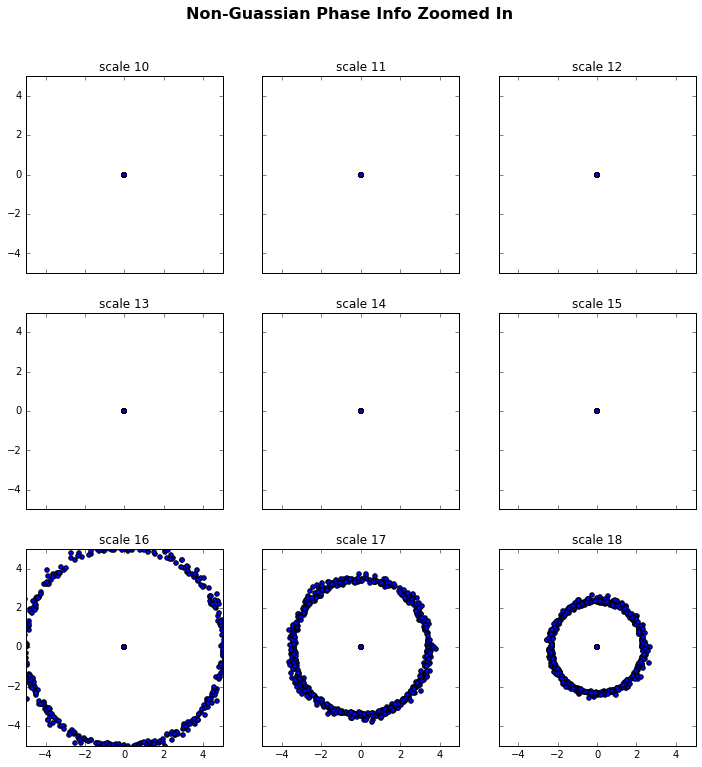

In [29]:
##plotting nongaussian phase info#
#fig = plt.figure(1, figsize=(14,14))
ng_fig, ng_axarr = plt.subplots(col, row, figsize=(12,12), sharex='col', sharey='row')
xlim = 5.
ylim = xlim
for i in range(col):
    for j in range(row):
        ng_axarr[i,j].scatter( x_c [ :,:,index[i,j]+ start ],y_c[:,:,index[i,j]+start])
        ng_axarr[i,j].set_title('scale '+str(index[i,j]+start))
        ng_axarr[i,j].set_xlim(-xlim,xlim)
        ng_axarr[i,j].set_ylim(-ylim,ylim)
ng_fig.suptitle('Non-Guassian Phase Info Zoomed In', fontsize=16, fontweight='bold')

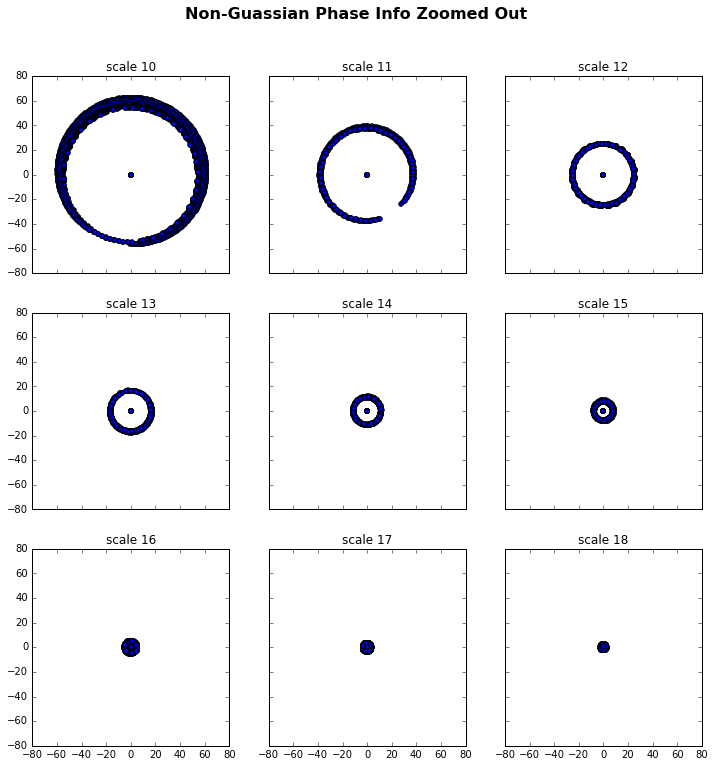

In [30]:
##plotting nongaussian phase info zoomed out#

zng_fig, zng_axarr = plt.subplots(col, row, figsize=(12,12), sharex='col', sharey='row')
xlim = 80.
ylim = xlim
for i in range(col):
    for j in range(row):
        zng_axarr[i,j].scatter( x_c [ :,:,index[i,j]+ start ],y_c[:,:,index[i,j]+start])
        zng_axarr[i,j].set_title('scale '+str(index[i,j]+start))
        zng_axarr[i,j].set_xlim(-xlim,xlim)
        zng_axarr[i,j].set_ylim(-ylim,ylim)
zng_fig.suptitle('Non-Guassian Phase Info Zoomed Out', fontsize=16, fontweight='bold')

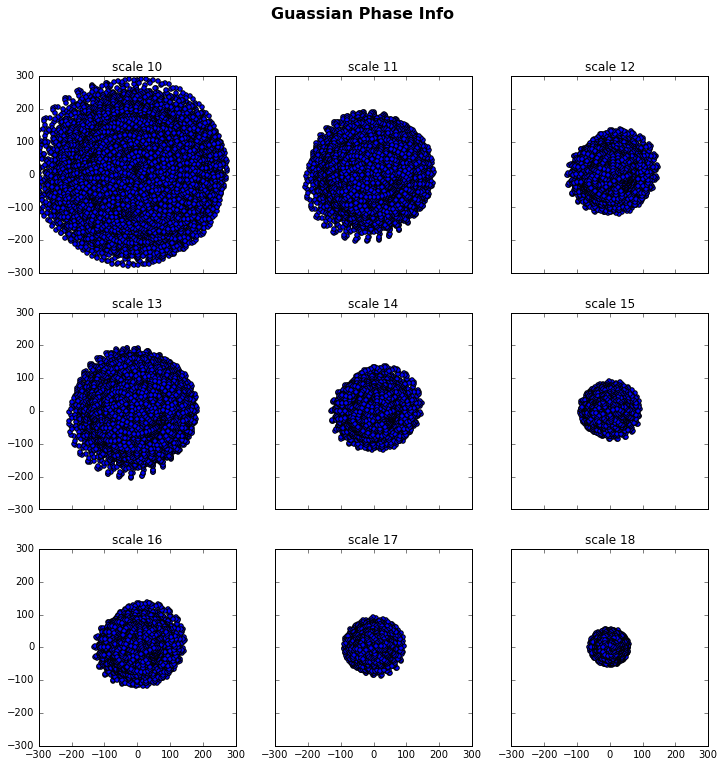

In [31]:
##plotting gaussian phase info#
#plt.figure(2)
g_fig, g_axarr= plt.subplots(col, row, sharex='col', sharey='row', figsize=(12,12))
xlim = 300.
ylim = xlim
for i in range(col):
    for j in range(row):
        g_axarr[i,j].scatter(x_n[:,:,i+j+10],y_n[:,:,i+j+10])
        g_axarr[i,j].set_title('scale '+str(index[i,j]+start))
        g_axarr[i,j].set_xlim(-xlim,xlim)
        g_axarr[i,j].set_ylim(-ylim,ylim)
g_fig.suptitle('Guassian Phase Info', fontsize=16, fontweight='bold')

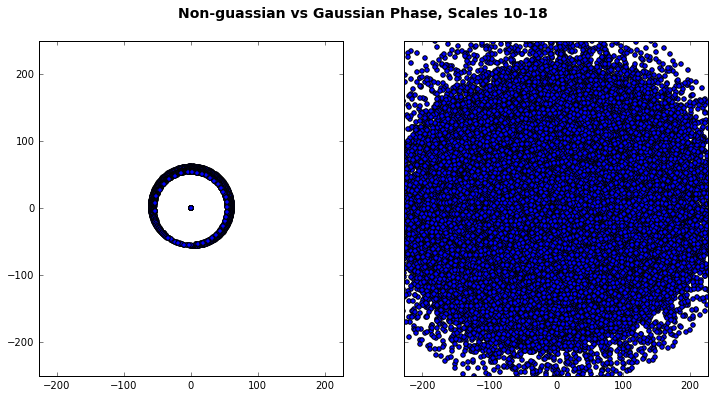

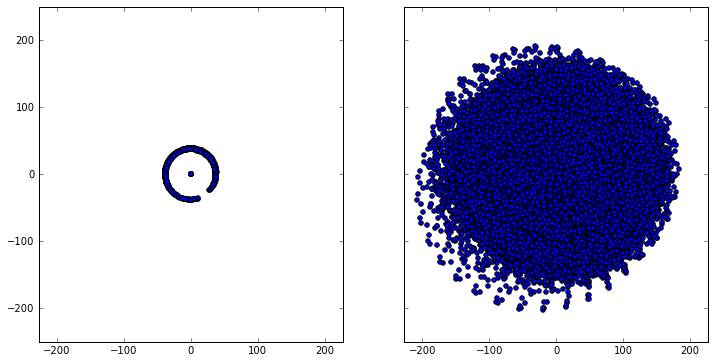

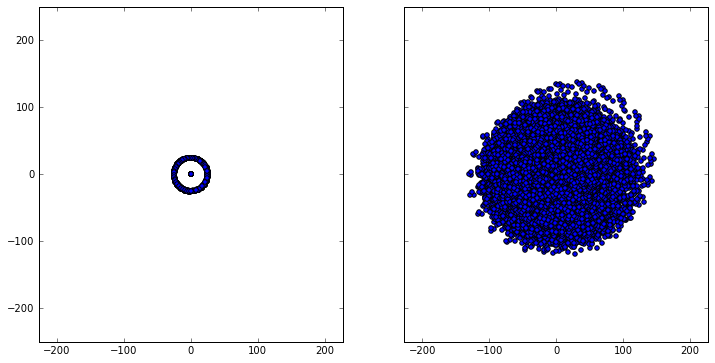

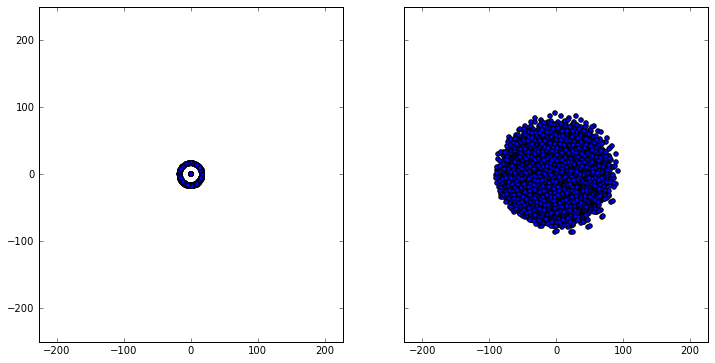

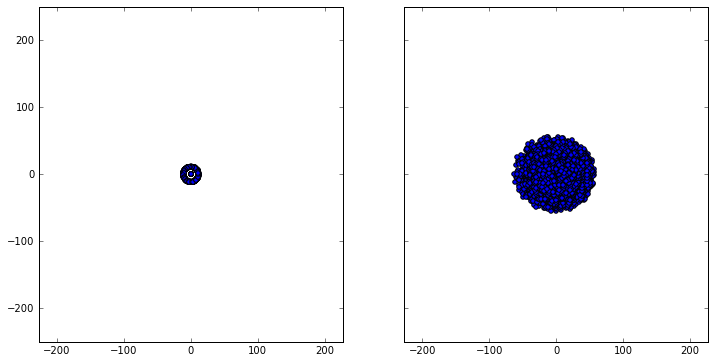

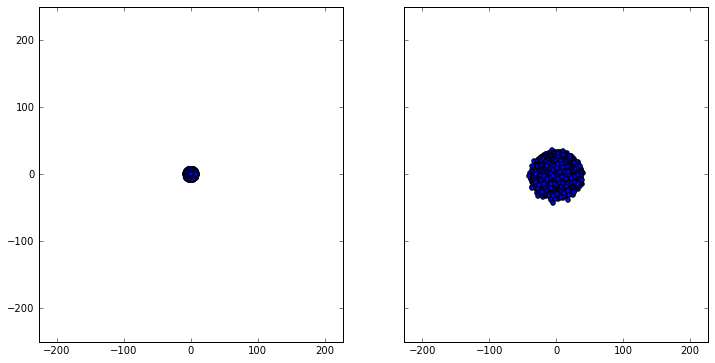

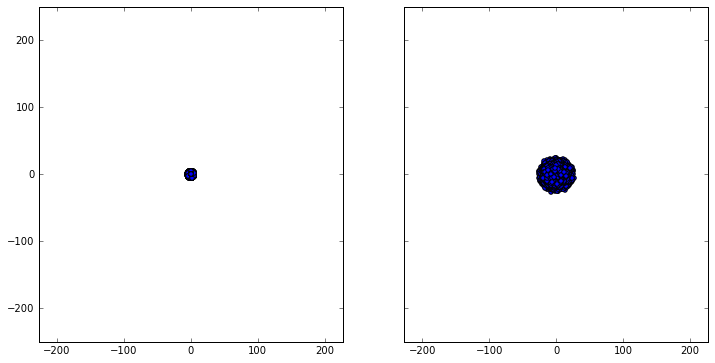

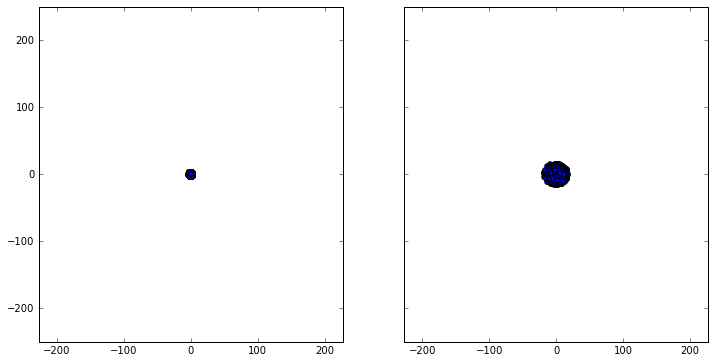

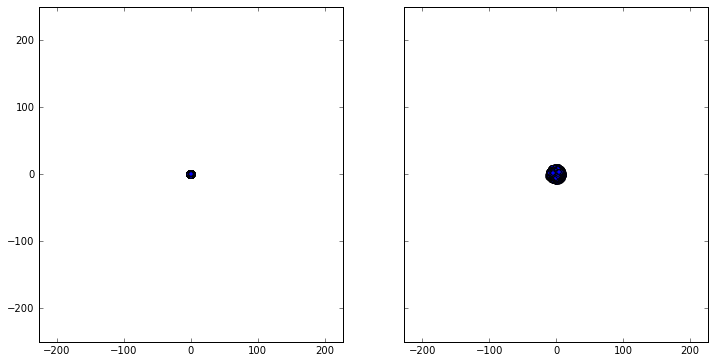

In [32]:
##on same plot#
fig=list()
axarr=list()
xmax = 250.
ymax = xmax
for i in range (total):
    fig_i, axarr_i= plt.subplots (1,2, sharex='all', sharey='all', figsize=(12,6))
    axarr_i[0].scatter(x_c[:,:,i+start], y_c[:,:,i+start])
    axarr_i[1].scatter(x_n[:,:,i+start], y_n[:,:,i+start])
    axarr_i[0].set(xlim=[-xmax, xmax], ylim=[-ymax, ymax], aspect=1)# adjustable='box-forced')
    axarr_i[1].set(xlim=[-xmax, xmax], ylim=[-ymax, ymax], aspect=1)
    #plt.axes().set_aspect('equal', 'datalim')
    fig.append(fig_i)
    axarr.extend(axarr_i)
fig[0].suptitle('Non-guassian vs Gaussian Phase, Scales 10-18', fontsize=14, fontweight='bold')
 